In [1]:
!pip install gdown

  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9034 sha256=fb6b8f8855ab9e3c3cb65681601a8e1a3da5da1e536b8fac0b863c2794037714
  Stored in directory: /root/.cache/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown


In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1_WuUfkGq9z_WKBTw-S1mjGlk4IhkQwM0' 
output = './JPG_FILE.tar' 
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_WuUfkGq9z_WKBTw-S1mjGlk4IhkQwM0
To: /kaggle/working/JPG_FILE.tar
788MB [00:06, 126MB/s]


'./JPG_FILE.tar'

In [3]:
import tarfile

#simple function to extract the train data
#tar_file : the path to the .tar file
#path : the path where it will be extracted
def extract(tar_file, path):
    opened_tar = tarfile.open(tar_file)
     
    if tarfile.is_tarfile(tar_file):
        opened_tar.extractall(path)
    else:
        print("The tar file you entered is not a tar file")

In [4]:
extract('./JPG_FILE.tar','./PovertyCelebes/')

In [5]:
!pip install fastai --upgrade -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kornia 0.5.5 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
allennlp 2.5.0 requires torch<1.9.0,>=1.6.0, but you have torch 1.9.0 which is incompatible.
allennlp 2.5.0 requires torchvision<0.10.0,>=0.8.1, but you have torchvision 0.10.0 which is incompatible.


In [6]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.vision.augment import *
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *
from fastai.callback.all import *
from fastai.metrics import error_rate,accuracy
import gc

In [7]:
import pandas as pd
import re
import os

In [8]:
df=pd.read_csv('../input/bin-gmm/bin_cluster_GMM.csv',sep=';')
df.head()

,IDKEC,GMM_bin,Jenks_bin,GRID_SAT,GRID_SAT_JPG,yj_mean_w,mean_weight
0,7104080,0,1,CNN_DIMG_IND_2015_LS_256_3840_000001_REV.tif,CNN_DIMG_IND_2015_LS_256_3840_000001_REV.jpg,-0.411780,0.00000
1,7104080,3,4,CNN_DIMG_IND_2015_LS_256_3840_000002_REV.tif,CNN_DIMG_IND_2015_LS_256_3840_000002_REV.jpg,2.316555,0.36447
2,7104060,0,1,CNN_DIMG_IND_2015_LS_256_3840_000003_REV.tif,CNN_DIMG_IND_2015_LS_256_3840_000003_REV.jpg,-0.411780,0.00000
3,7104070,0,1,CNN_DIMG_IND_2015_LS_256_3840_000004_REV.tif,CNN_DIMG_IND_2015_LS_256_3840_000004_REV.jpg,-0.411780,0.00000
4,7104070,0,1,CNN_DIMG_IND_2015_LS_256_3840_000005_REV.tif,CNN_DIMG_IND_2015_LS_256_3840_000005_REV.jpg,-0.411780,0.00000


class_count 
 GMM_bin
0    10422
1      648
2      513
3      667
4      440
dtype: int64 



<AxesSubplot:xlabel='GMM_bin'>

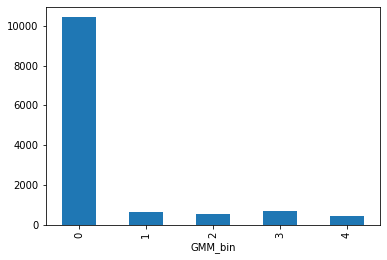

In [9]:
label_col = 'GMM_bin'     # name of column containing the binned luminosity in dataset
filename_col = 'GRID_SAT_JPG' # name of column containing the imagery filenames in dataset

country='IND'
year='2015'
day_sat='LS'
img_res=256

class_count=df.groupby(label_col).size()
print("class_count","\n",class_count,"\n")
df.groupby(['GMM_bin']).size().plot.bar( )

In [10]:
df_0=df.query('GMM_bin==\'0\'')
df_x=df.loc[df.query('GMM_bin!=\'0\'').index.repeat(3)]
df_=df_0.append(df_x).reset_index()
df_.GMM_bin=df_.GMM_bin.astype(str)

In [11]:
df_sample=df_.groupby('GMM_bin').sample(n=1000,random_state=123).copy()
test_datasetGMM=df_[~df_.isin(df_sample)].groupby('GMM_bin').sample(n=100,random_state=123).copy()

In [12]:
df_sample[['yj_mean_w','GMM_bin']].groupby('GMM_bin').agg(['mean','median','min','max'])

yj_mean_w                              
             mean    median       min       max
GMM_bin                                        
0       -0.411780 -0.411780 -0.411780 -0.411780
1        2.782539  2.826644  2.394036  2.976352
2        0.176744  0.168605 -0.349972  0.718274
3        1.626452  1.654614  0.720649  2.390259
4        2.981835  2.982524  2.976471  2.982540

In [13]:
import os
arr = os.listdir('./PovertyCelebes/content/drive/MyDrive/POVERTY_CELEBES_CNN_IMGB_IND_2015_LS_256_TIF_3840/JPG_FILE/')

In [14]:
arr[:10]

['CNN_DIMG_IND_2015_LS_256_3840_005400_REV.jpg.aux.xml',
 'CNN_DIMG_IND_2015_LS_256_3840_011653_REV.jpg',
 'CNN_DIMG_IND_2015_LS_256_3840_003204_REV.jpg.aux.xml',
 'CNN_DIMG_IND_2015_LS_256_3840_007695_REV.jpg',
 'CNN_DIMG_IND_2015_LS_256_3840_003810_REV.jpg.aux.xml',
 'CNN_DIMG_IND_2015_LS_256_3840_011399_REV.jpg',
 'CNN_DIMG_IND_2015_LS_256_3840_009187_REV.jpg',
 'CNN_DIMG_IND_2015_LS_256_3840_008697_REV.jpg',
 'CNN_DIMG_IND_2015_LS_256_3840_012539_REV.jpg',
 'CNN_DIMG_IND_2015_LS_256_3840_008212_REV.jpg']

In [15]:
root_col='./PovertyCelebes/content/drive/MyDrive/POVERTY_CELEBES_CNN_IMGB_IND_2015_LS_256_TIF_3840/JPG_FILE/'
bs_val=16
aug_tfms=[Contrast(draw=[0.9, 1.1],p=0.8)
          ,Dihedral(),Warp(),Brightness(draw=[0.9,1.1],p=0.8),Rotate(p=1.,draw=[-30,-15,0,15,30])]
tfms = aug_transforms(flip_vert=True, 
                      max_lighting=0.4,
                      xtra_tfms=aug_tfms,
                      )
data_GMM = ImageDataLoaders.from_df(df=df_sample, # using df to define training dataset
                              seed = 23,
                              path = root_col,
                                    bs=bs_val,
                              valid_pct=.2,   # 20% of data will be used for validation
                              fn_col='GRID_SAT_JPG', # filename column in dataset
                              label_col='GMM_bin', # classes column in dataset
                              ds_tfms=tfms,        # use transformations defined above
                              size=img_res,         # image size
                              batch_tfms=Normalize.from_stats(*imagenet_stats)
                               )

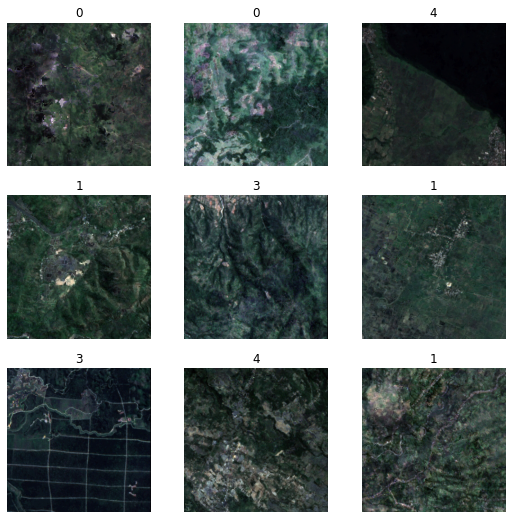

In [16]:
data_GMM.show_batch()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.261757,1.536941,0.626000,00:49
1,2.081618,1.484457,0.576000,00:48
2,1.905252,1.289621,0.516000,00:47
3,1.687191,1.219586,0.498000,00:48
4,1.597484,1.206691,0.475000,00:48
5,1.416143,1.155344,0.473000,00:47
6,1.385767,1.105427,0.475000,00:48
7,1.335105,1.101749,0.455000,00:48
8,1.285894,1.030626,0.415000,00:47
9,1.264019,1.017565,0.394000,00:47


/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


Better model found at epoch 0 with error_rate value: 0.6259999871253967.


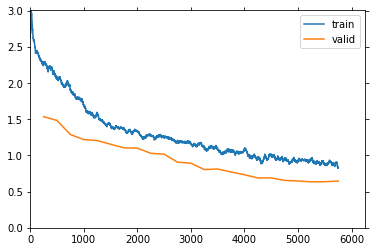

Better model found at epoch 1 with error_rate value: 0.5759999752044678.
Better model found at epoch 2 with error_rate value: 0.515999972820282.
Better model found at epoch 3 with error_rate value: 0.49799999594688416.
Better model found at epoch 4 with error_rate value: 0.4749999940395355.
Better model found at epoch 5 with error_rate value: 0.4729999899864197.
Better model found at epoch 7 with error_rate value: 0.45500001311302185.
Better model found at epoch 8 with error_rate value: 0.41499999165534973.
Better model found at epoch 9 with error_rate value: 0.39399999380111694.
Better model found at epoch 10 with error_rate value: 0.3319999873638153.
Better model found at epoch 11 with error_rate value: 0.32100000977516174.
Better model found at epoch 12 with error_rate value: 0.2840000092983246.
Better model found at epoch 14 with error_rate value: 0.27399998903274536.
Better model found at epoch 15 with error_rate value: 0.23899999260902405.
Better model found at epoch 16 with erro

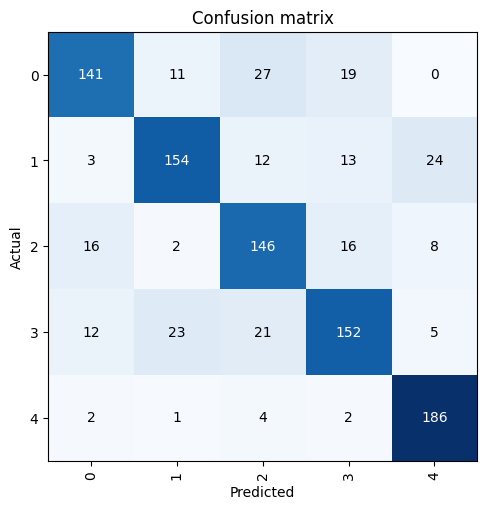

In [17]:
learn_GMM = None
gc.collect()
learn_GMM = cnn_learner(data_GMM, models.densenet121, 
                        metrics = error_rate, 
                        loss_func=CrossEntropyLossFlat())

callbacks_GMM = [SaveModelCallback(fname="No_wt",monitor='error_rate'),CutMix(alpha=.8),
             ShowGraphCallback(),
             EarlyStoppingCallback( min_delta=0.0001, patience=3)
             ]

learn_GMM.fit_one_cycle(25,wd=0.1,cbs=callbacks_GMM)

interp_GMM = ClassificationInterpretation.from_learner(learn_GMM)
interp_GMM.plot_confusion_matrix(figsize=(5,5), dpi=100)

/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=1.2022644114040304e-05)

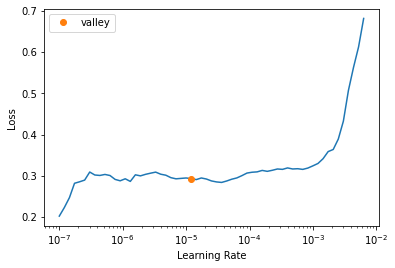

In [18]:
learn_GMM.freeze_to(-2)
learn_GMM.lr_find()

In [19]:
learn_GMM.fine_tune(5,1e-7) # 6 epochs

epoch,train_loss,valid_loss,error_rate,time
0,0.311134,0.655665,0.214000,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.303373,0.660264,0.216000,00:58
1,0.317298,0.658971,0.212000,00:59
2,0.313794,0.652873,0.213000,00:58
3,0.303755,0.660959,0.218000,00:59
4,0.315477,0.652917,0.212000,00:58


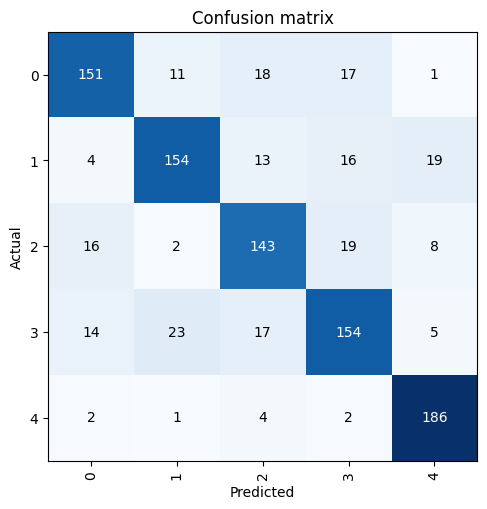

In [20]:
interp_GMM = ClassificationInterpretation.from_learner(learn_GMM)

losses,idxs = interp_GMM.top_losses()
interp_GMM.plot_confusion_matrix(figsize=(5,5), dpi=100)

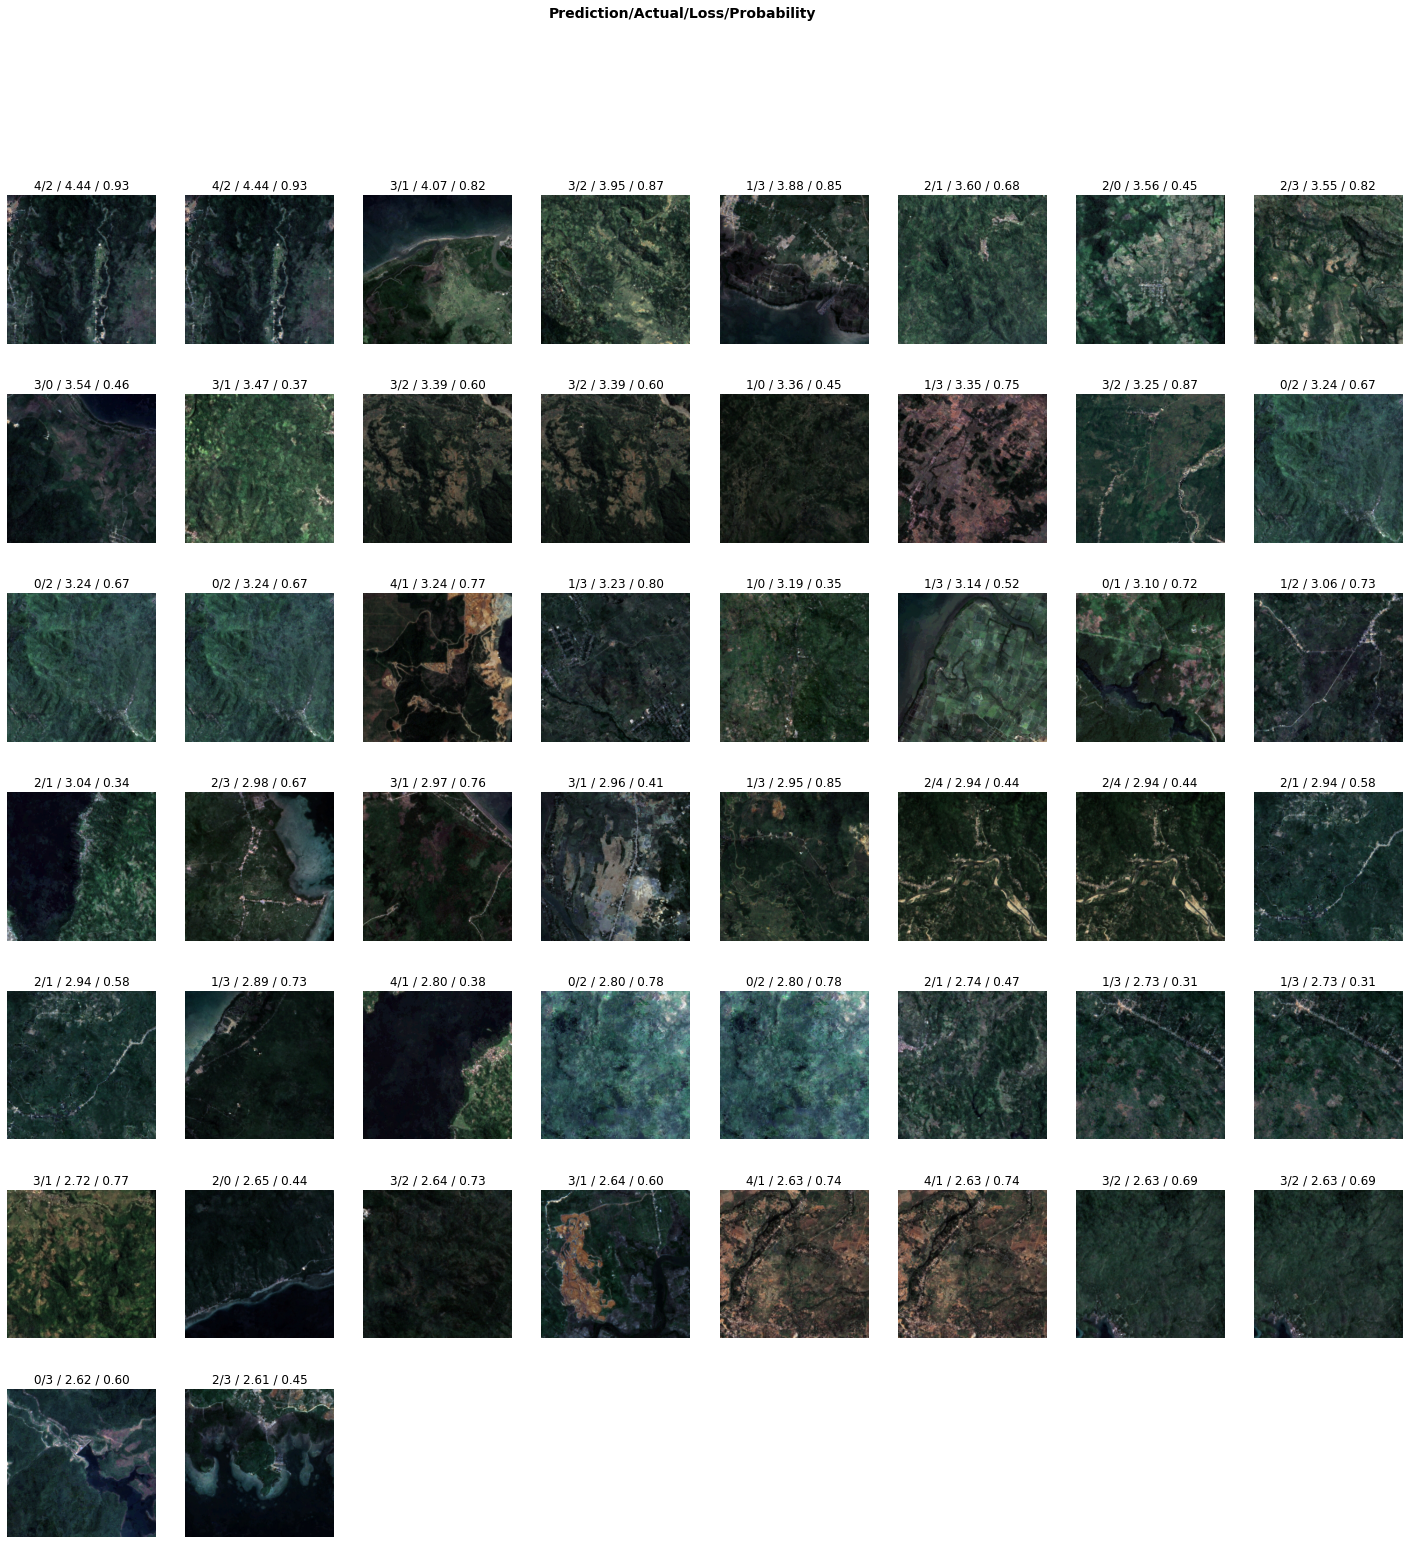

In [21]:
interp_GMM.plot_top_losses(50, figsize=(25,25))

In [22]:
import shutil
save_path = ".//Poverty_models/"
learner_filename='CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pkl'
modelWt_filename='CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pth'
os.makedirs(save_path, exist_ok=True)
learn_GMM.export(fname=learner_filename) #train and export learner
learn_GMM.save(modelWt_filename)

Path('PovertyCelebes/content/drive/MyDrive/POVERTY_CELEBES_CNN_IMGB_IND_2015_LS_256_TIF_3840/JPG_FILE/models/CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pth.pth')

In [23]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

find('*.pkl', './PovertyCelebes/')

['./PovertyCelebes/content/drive/MyDrive/POVERTY_CELEBES_CNN_IMGB_IND_2015_LS_256_TIF_3840/JPG_FILE/CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pkl']

In [24]:
shutil.copy('PovertyCelebes/content/drive/MyDrive/POVERTY_CELEBES_CNN_IMGB_IND_2015_LS_256_TIF_3840/JPG_FILE/models/CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pth.pth','./'+modelWt_filename)
shutil.copy('./PovertyCelebes/content/drive/MyDrive/POVERTY_CELEBES_CNN_IMGB_IND_2015_LS_256_TIF_3840/JPG_FILE/CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pkl','./'+learner_filename)

'./CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pkl'

In [25]:
learn=None
gc.collect()

60

class_count 
 GMM_bin
0    100
1    100
2    100
3    100
4    100
dtype: int64 



<AxesSubplot:xlabel='GMM_bin'>

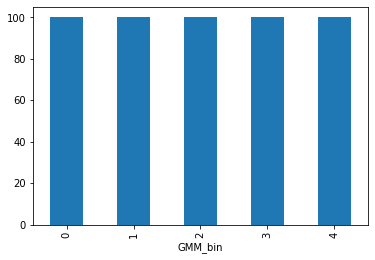

In [26]:
test_dataset=test_datasetGMM
class_count=test_dataset.groupby('GMM_bin').size()
print("class_count","\n",class_count,"\n")
test_dataset.groupby(['GMM_bin']).size().plot.bar( )

In [27]:
bs_val = 16  
path_folder='/content/drive/MyDrive/POVERTY_CELEBES_CNN_IMGB_IND_2015_LS_256_TIF_3840/JPG_FILE/'
df_val = test_dataset[['GMM_bin','GRID_SAT_JPG']].copy()

In [28]:
learn = load_learner('./CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pkl')
learn.load('./CNN_LRNR_RES34_IND_2020_LS_256_new_fast_propert.pth')

In [29]:
test_dl=learn.dls.test_dl(df_val)
pred_tensor, ignored, preds=learn.get_preds(dl=test_dl, with_decoded=True)

In [30]:
df_val['GMM_bin_pred']=preds
df_val=df_val.reset_index()

<AxesSubplot:xlabel='GMM_bin_pred', ylabel='GMM_bin'>

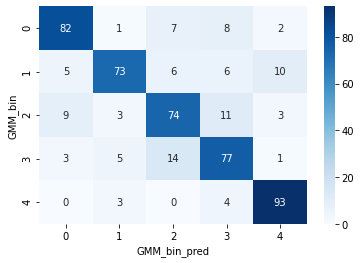

In [31]:
import seaborn as sns
result=df_val.pivot_table(values='GRID_SAT_JPG',index='GMM_bin',columns='GMM_bin_pred',aggfunc='count').fillna(0)
sns.heatmap(result, annot=True, 
            cmap='Blues')

In [32]:
df_val.GMM_bin_pred=df_val.GMM_bin_pred.astype(str)
accuracy=df_val.query('GMM_bin==GMM_bin_pred').shape[0]/df_val.shape[0]
print('Accuracy on test:',accuracy*100,'%')

Accuracy on test: 79.80000000000001 %
